In [1]:
!pwd

/panda/eedy/Kyushu/notebook


In [2]:
from mintpy.objects import ramp
from mintpy.utils import ptime, readfile, writefile
import h5py
import numpy as np
from matplotlib import pyplot as plt, colorbar, ticker, colors
from mintpy.utils import ptime, readfile, writefile

In [3]:
path = 'geo_ion-split.h5'
timeseries = readfile.read(path, datasetName='timeseries')[0]
timeseries = np.squeeze(timeseries)
data_out, ramp = ramp.deramp(timeseries, mask_in=None, ramp_type='linear', metadata=None, max_num_sample=1e3, coeff_file=None,ignore_zero_value=True)

In [4]:
ramp.shape

(50, 543, 392)

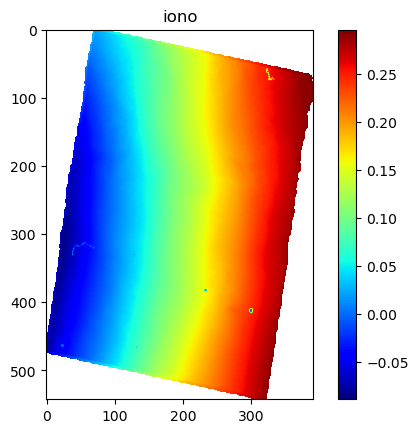

In [5]:
plt.imshow(timeseries[19, :, :], cmap='jet')
plt.colorbar()
plt.title('iono')
plt.show()

In [6]:
#!/usr/bin/env python3
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def function(data, a, b, c):
    '''
    拟合曲面使用的函数
    '''
    x = data[0]
    y = data[1]
    return a*x+b*y + c


# 初始化数据
x_data = ramp.shape[2]
y_data = ramp.shape[1]
# X, Y, Z 都是二维的数据
X_data, Y_data = np.meshgrid(range(x_data), range(y_data))

# 目标曲面的方程为 z = a*x + b*y + c
# 待求参数值为 [a,b,c]
Z_data = ramp[19, :,:]

# 将数据点展开成一维
x_data = X_data.flatten()
y_data = Y_data.flatten()
z_data = Z_data.flatten()

parameters, covariance = curve_fit(function, [x_data, y_data], z_data)
# 显示根据拟合得到的曲面方程参数 [a,b,c]
print("The equation of the fit plane is: Z = {0} * X + {1} * Y + {2}".format(parameters[0],parameters[1],parameters[2]))

# plot surface
Z_fit = function([X_data, Y_data], *parameters)

The equation of the fit plane is: Z = 0.0010737392910627954 * X + 4.9101491776462695e-05 * Y + -0.10254964046769606


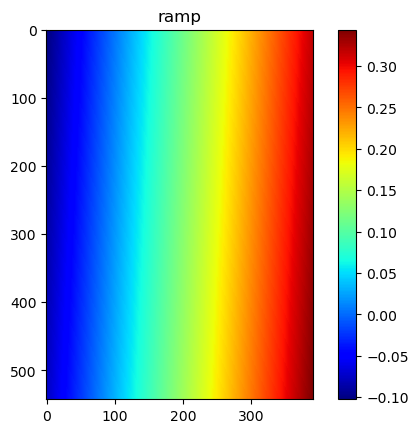

In [7]:
plt.imshow(Z_fit, cmap='jet')
plt.colorbar()
plt.title('ramp')
plt.show()

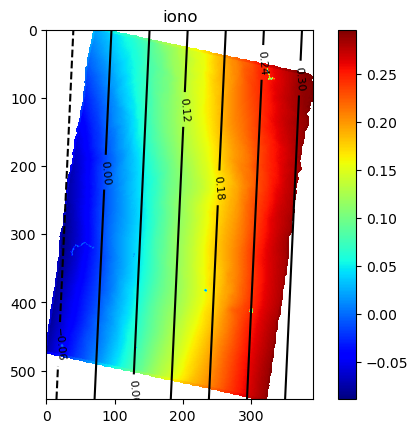

The average gradient magnitude is( m(ion)/ m(juli)): 5.4670326841626726e-06
The average gradient magnitude is( mm(ion)/ km(juli)): 5.467032684162673
The average gradient direction is: 173.59440366491458


In [11]:
meta = readfile.read_attribute(path)
AZIMUTH_PIXEL_SIZE =  float(meta['AZIMUTH_PIXEL_SIZE'])
RANGE_PIXEL_SIZE = float(meta['RANGE_PIXEL_SIZE'])

# 计算梯度，考虑到横纵坐标的实际长度
dx = parameters[1]/RANGE_PIXEL_SIZE
dy = parameters[0]/AZIMUTH_PIXEL_SIZE
# 计算梯度的大小和方向
magnitude = np.hypot(dx, dy)  # 梯度的大小
direction = np.degrees(np.arctan2(dy, dx)) + 90  # 梯度的方向，以x轴正半轴为0°，逆时针旋转为正方向
direction = (direction + 360) % 360  # 将角度值限制在0°到360°之间

# 绘制结果
fig = plt.figure()
ax = fig.add_subplot(111)

# 绘制等高线图
z_fit = function([X_data, Y_data], *parameters)
cp = ax.contour(X_data, Y_data, z_fit, colors='black')
ax.clabel(cp, inline=True, fontsize=8)

# 设置坐标轴范围和纵横比
ax.set_xlim(0, x_data[-1])  # 横坐标范围
ax.set_ylim(y_data[-1], 0)  # 纵坐标范围


plt.imshow(timeseries[19, :, :], cmap='jet')
plt.colorbar()
plt.title('iono')

plt.show()

print("The average gradient magnitude is( m(ion)/ m(juli)):", magnitude)
print("The average gradient magnitude is( mm(ion)/ km(juli)):", magnitude*1e6)
print("The average gradient direction is:", direction)